# Gestión riesgos de las carteras


La gestión del **riesgo de cartera** es el proceso de identificar, evaluar y mitigar los diversos riesgos asociados con una cartera de inversiones.

Implica implementar estrategias para optimizar el equilibrio entre riesgo y retorno, asegurando que la cartera se alinee con los **objetivos financieros y la tolerancia al riesgo del inversor**. 

Una gestión de riesgos efectiva ayuda a minimizar las pérdidas potenciales, optimizar los retornos y mejorar el rendimiento de la inversión a largo plazo.

La gestión del riesgo de cartera es esencial para optimizar el rendimiento y proteger las inversiones.

Implica la identificación y evaluación de riesgos, la implementación de estrategias de mitigación y la monitoriazción continua.

Herramientas como el valor en riesgo, la desviación estándar y la beta son fundamentales en este proceso.

Estrategias como la diversificación y el reequilibrio ayudan a minimizar el impacto de los riesgos.

Una gestión efectiva del riesgo permite ajustes informados, contribuyendo a la estabilidad y crecimiento de la cartera a largo plazo.

### Componentes clave de la gestión del riesgo de cartera:

1. **Identificación de Riesgos:** Implica reconocer los diversos riesgos asociados con una cartera de inversiones, incluidos los relacionados con activos específicos, sectores o estrategias de inversión.

2. **Evaluación y Medición de Riesgos:** Involucra cuantificar el impacto potencial de los riesgos identificados en el desempeño de la cartera de inversiones. Este paso utiliza diversas herramientas y métricas, como el valor en riesgo (VaR), la desviación estándar y la beta.

3. **Estrategias de Mitigación de Riesgos:** Implica implementar tácticas para reducir el impacto potencial de los riesgos identificados en la cartera. Estas estrategias pueden incluir diversificación, ajustes en la asignación de activos, cobertura y reequilibrio.

4. **Monitoreo y Revisión de Riesgos:** Involucra la evaluación continua y la valoración del perfil de riesgo de la cartera y la efectividad de las estrategias de gestión de riesgos implementadas. Las revisiones regulares de la cartera ayudan a los inversores a tomar decisiones informadas y ajustar sus estrategias según sea necesario.


### Estrategias clave para la gestión del riesgo en carteras:

- **Diversificación:** Repartir inversiones en diferentes clases de activos y regiones para minimizar el impacto de riesgos específicos.
- **Asignación de Activos:** Determinar la combinación óptima de activos basada en la tolerancia al riesgo y objetivos del inversor.
- **Reequilibrio:** Ajustar la asignación de activos para mantener el nivel de riesgo deseado.
- **Cobertura:** Usar instrumentos financieros para reducir o compensar el riesgo de movimientos de precios adversos.
- **Retornos Ajustados por Riesgo:** Evaluar el rendimiento considerando el retorno y el riesgo, para tomar decisiones informadas.
- **Pruebas de Estrés y Análisis de Escenarios:** Evaluar el impacto de condiciones de mercado adversas en la cartera para identificar y ajustar vulnerabilidades.
- **Uso de Derivados y Productos Estructurados:** Emplear estos instrumentos para gestionar el riesgo, limitando las pérdidas potenciales.

Estas estrategias ayudan a optimizar el equilibrio entre riesgo y retorno, protegiendo y potenciando el valor de la cartera a largo plazo.


En este notebook vamos a analizar distintas maneras de medir el riesgo de un activo o cartera.

La medición del riesgo de un activo o cartera se enfoca en analizar las colas de la distribución de retornos, destacando los resultados extremos tanto positivos como negativos.

Este análisis permite evaluar la probabilidad e impacto de eventos de mercado inusuales, más allá de lo que indican medidas tradicionales como la volatilidad.

Al entender estos extremos, los inversores pueden diseñar estrategias de mitigación más efectivas, preparándose para escenarios de alto riesgo y protegiendo mejor sus inversiones contra sorpresas adversas.

Las principales medidas o ratios que vamos a usar son:

- Volatilidad
- Ratio de sharpe
- Ratio de Infomación
- Ratio de Treinor
- Ratio de Sortino
- Máximo Drawdown
- Tiempo de recuperación
- Ratio de Calmar
- Bull Beta
- Bear Beta


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# print(plt.style.available) #list of available styles
plt.style.use('ggplot')

In [3]:
precios = pd.read_excel('../data/data.xlsx', header=0, index_col=0, parse_dates=True)
precios = precios.dropna()
retornos = np.log(precios).diff().dropna()
retornos

AAPL   BTC-USD       IEF    ELE.MC      CSCO      MSFT  \
Date                                                                     
2014-09-18  0.002065 -0.074643 -0.000683  0.008327  0.000397  0.003433   
2014-09-19 -0.008187 -0.072402  0.003795  0.004727 -0.000793  0.017835   
2014-09-22  0.000990  0.018461  0.002135  0.009055 -0.009169 -0.009727   
2014-09-23  0.015514  0.080333  0.002130  0.001501 -0.010872 -0.010682   
2014-09-24 -0.008709 -0.029306 -0.002809  0.012587  0.011272  0.011106   
...              ...       ...       ...       ...       ...       ...   
2023-09-28  0.001524  0.025063  0.002734 -0.003376  0.012701  0.002714   
2023-09-29  0.003042 -0.004073  0.000218  0.002858 -0.002230  0.006705   
2023-10-02  0.014727  0.022743 -0.008145 -0.036185  0.011651  0.018979   
2023-10-03 -0.007800 -0.003668 -0.008312 -0.012722 -0.006503 -0.026482   
2023-10-04  0.007282  0.013378  0.006323  0.005433 -0.003735  0.017617   

                ORCL       IAU      TSLA       IBM      INTC  
Date                                                          
2014-09-18  0.009917  0.002533  0.009292  0.004915  0.005417  
2014-09-19 -0.043031 -0.005920 -0.017204  0.001289 -0.010002  
2014-09-22 -0.005543 -0.002548 -0.036482 -0.004598 -0.003164  
2014-09-23 -0.019131  0.005935  0.001519 -0.007746 -0.008390  
2014-09-24  0.015080 -0.003387  0.006885  0.003594  0.009542  
...              ...       ...       ...       ...       ...  
2023-09-28  0.014518 -0.005360  0.024155 -0.011168  0.016335  
2023-09-29 -0.002169 -0.010236  0.015465 -0.009082  0.010462  
2023-10-02  0.007431 -0.010053  0.005500  0.003557 -0.002535  
2023-10-03 -0.020736 -0.003181 -0.020357 -0.002916  0.006465  
2023-10-04  0.024198 -0.000290  0.057650  0.004832  0.006702  

[2256 rows x 11 columns]

Text(0.5, 1.0, 'Volatilidad')

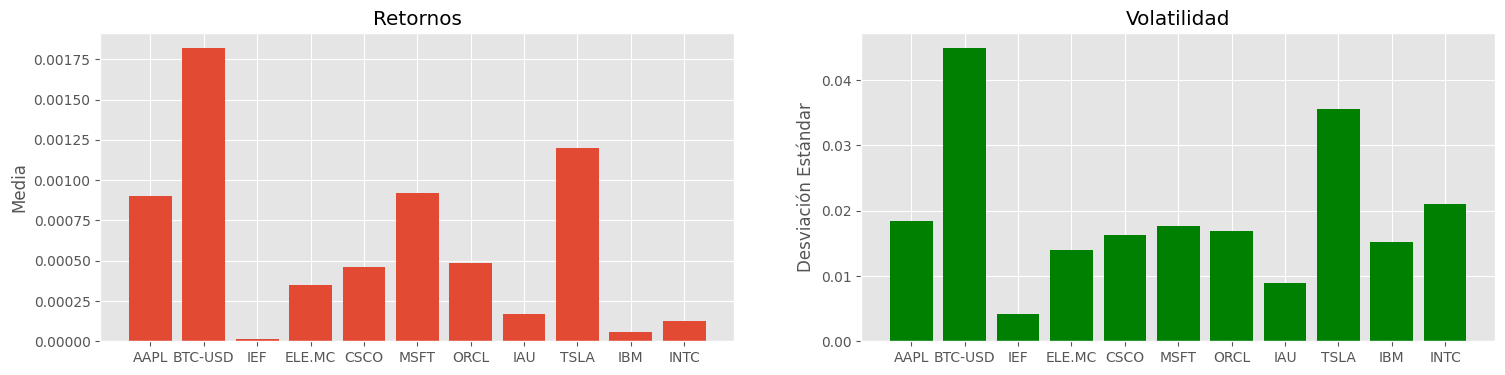

In [4]:
means = retornos.mean()
stds = retornos.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')



In [5]:
rte_close_df = retornos.loc[:, ['BTC-USD', 'TSLA', 'IEF']]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

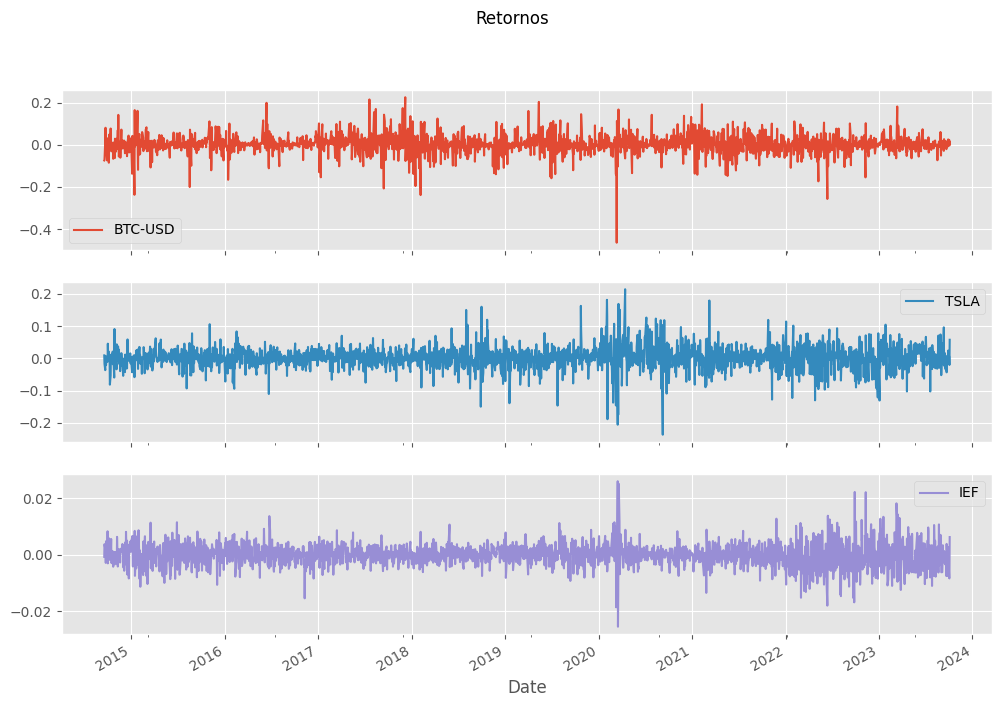

In [6]:
retornos.loc[:, ['BTC-USD', 'TSLA', 'IEF']].plot(subplots=True, figsize=(12, 8), title='Retornos')

In [7]:
# Crear un gráfico de líneas con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['BTC-USD'], 
                         mode='lines',
                         name='BTC-USD'))

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['IEF'], 
                         mode='lines',
                         name='IEF')) #iShares 7-10 Year Treasury Bond ETF

# Añadir títulos
fig.update_layout(
    title="COMPARACIÓN ACTIVOS CON MUCHA Y POCA VOLATILIDAD",
    title_font=dict(size=18),  # Ajusta el tamaño del título
    title_x=0.5,  # Centra el título
    yaxis_title="Retornos diarios %",
    margin=dict(l=20, r=20, b=20, t=40),  # Ajusta los márgenes para hacer los bordes más pequeños
)

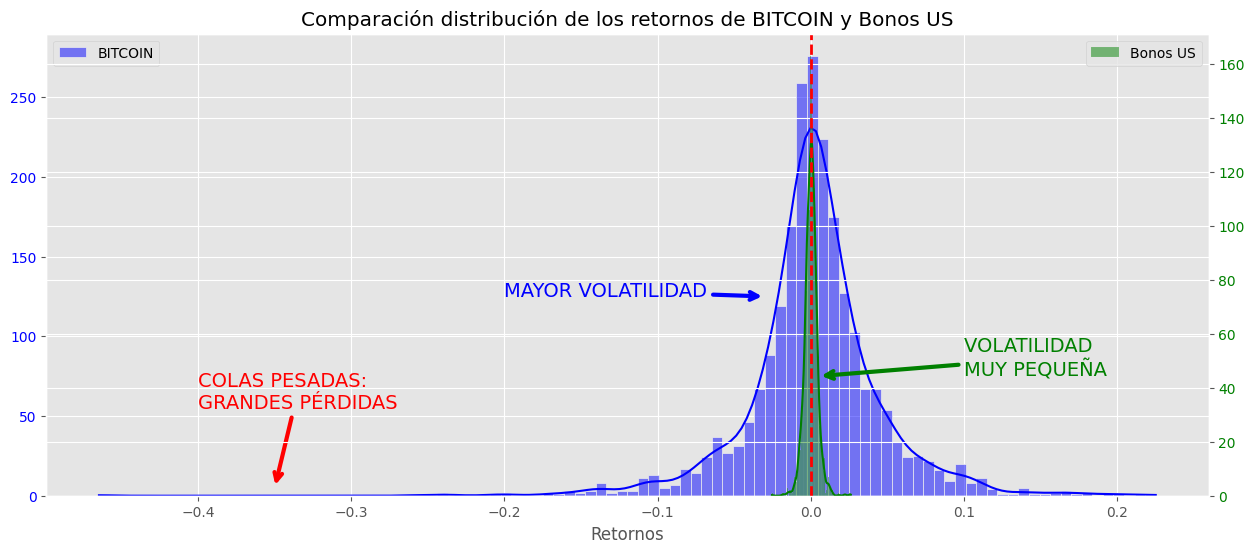

In [8]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=retornos, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=retornos, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()

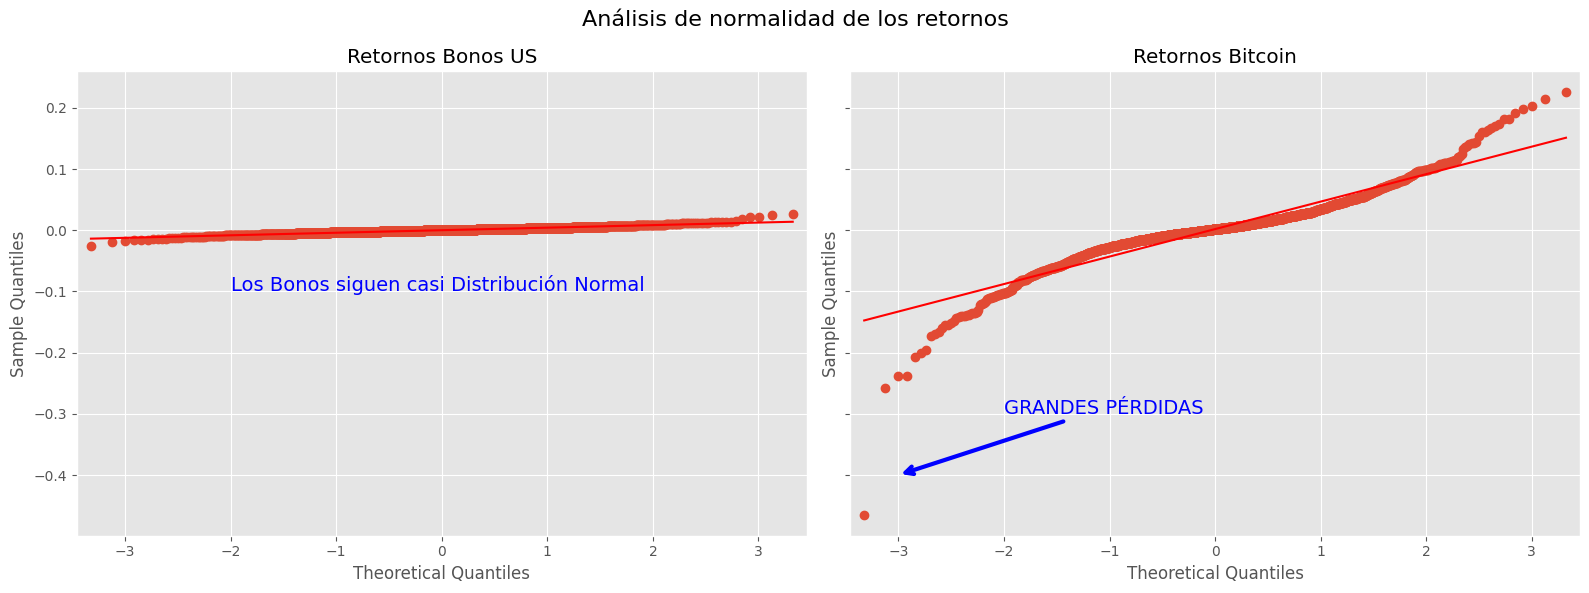

In [9]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey='row')

# Graficar el primer histograma 
sm.qqplot(retornos['IEF'], line='s', ax=axs[0])
axs[0].set_title('Retornos Bonos US')
axs[0].text(-2, -0.1, "Los Bonos siguen casi Distribución Normal", fontsize=14, color='blue')

# Graficar el segundo histograma 
sm.qqplot(retornos['BTC-USD'], line='s', ax=axs[1])
axs[1].set_title('Retornos Bitcoin')

# # Dibuja una flecha utilizando annotate
axs[1].annotate('GRANDES PÉRDIDAS', xy=(-3, -0.4), xytext=(-2, -0.3),
             arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
             fontsize=14, color='blue')

fig.suptitle('Análisis de normalidad de los retornos', fontsize=16)
# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Vamos a aplicar de nuevo el test de [Kolmogorov-Smirnov](https://es.wikipedia.org/wiki/Prueba_de_Kolmog%C3%B3rov-Smirnov) para comprobar si Bitcoin sigue una distribución normal (ya hemos visto que no).

In [10]:
# Prueba de Kolmogorov-Smirnov
stat, p = stats.kstest(retornos['BTC-USD'], 'norm')

# Compara el valor p con un nivel de significancia (por ejemplo, 0.05)
alpha = 0.05
if p > alpha:
    print(f"El resultado es de {p:.4f}, lo que quiere decir que los datos SÍ SIGUEN una distribución normal (no podemos rechazar la hipótesis nula)")
else:
    print(f"El resultado es de {p:.4f}, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)")

El resultado es de 0.0000, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)


**CONCLUSIÓN: LOS RETORNOS NO SIGUEN UNA DISTRIBUCIÓN NORMAL**

* Las colas de la distribución de los retornos son más pesadas que las de una distribución normal.

* Esto quiere decir que hay más probabilidad de que ocurran eventos extremos (tanto positivos como negativos) de lo que cabría esperar si los retornos siguieran una distribución normal.

* Por lo general, la cola izquierda es más pesada que la derecha, lo que quiere decir que hay más probabilidad de que ocurran eventos negativos extremos que positivos extremos.

**CONSECUENCIA: PARA ESTIMAR ADECUADAMENTE EL RIESGO, LA VOLATILIDAD NO ES SUFICIENTE**

Necesitamos más información para caracterizar los activos. Necesitamos conceptos como:

* Asimetría y curtosis

* VaR

* CVaR

* Ratio de sharpe
  
* Ratio de Infomación
  
* Ratio de Treinor
  
* Ratio de Sortino
  
* Máximo Drawdown
  
* Tiempo de recuperación
  
* Ratio de Calmar
  
* Bull Beta
  
* Bear Beta


In [11]:
momentos_df = pd.DataFrame(index= retornos.columns, columns=['Media', 'Varianza', 'Skewness', 'Kurtosis'])
momentos_df['Media'] = retornos.mean()
momentos_df['Varianza'] = retornos.var()
momentos_df['Skewness'] = retornos.skew()
momentos_df['Kurtosis'] = retornos.kurtosis()
momentos_df


Media  Varianza  Skewness   Kurtosis
AAPL     0.000903  0.000340 -0.205340   5.293072
BTC-USD  0.001821  0.002017 -0.655660   9.018972
IEF      0.000016  0.000017  0.131710   3.495306
ELE.MC   0.000352  0.000195 -1.270125  14.522917
CSCO     0.000461  0.000262 -0.565645  11.395602
MSFT     0.000919  0.000309 -0.133629   7.932068
ORCL     0.000487  0.000283  0.323323  17.000851
IAU      0.000167  0.000080 -0.095909   2.903399
TSLA     0.001200  0.001262 -0.086954   4.919928
IBM      0.000055  0.000233 -0.745875  10.335805
INTC     0.000125  0.000442 -0.589813  11.572671

Text(0.5, 1.0, 'Kurtosis')

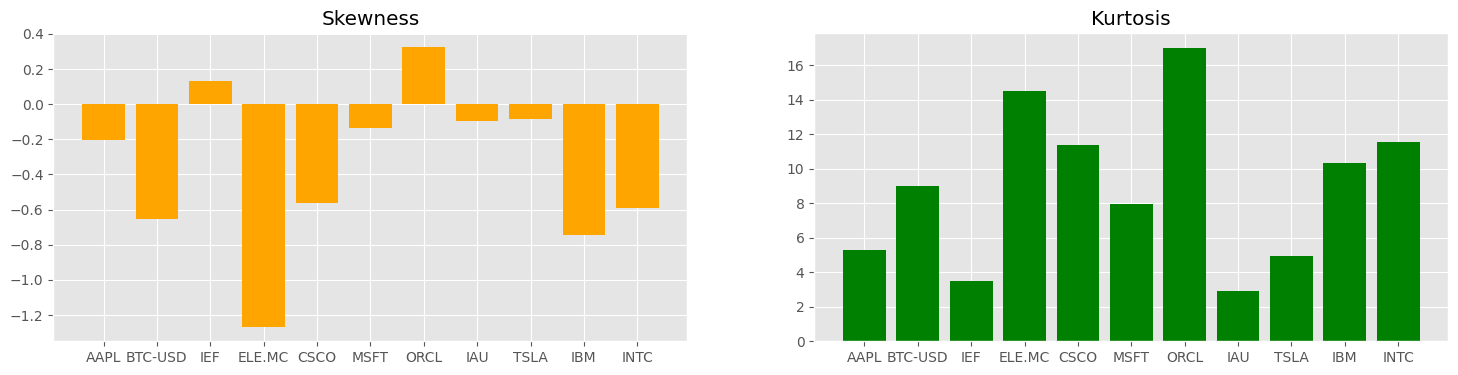

In [12]:
# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(momentos_df.index, momentos_df.Skewness.values, color='orange')

axes[0].set_title('Skewness')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(momentos_df.index, momentos_df.Kurtosis.values,color='green')

axes[1].set_title('Kurtosis')


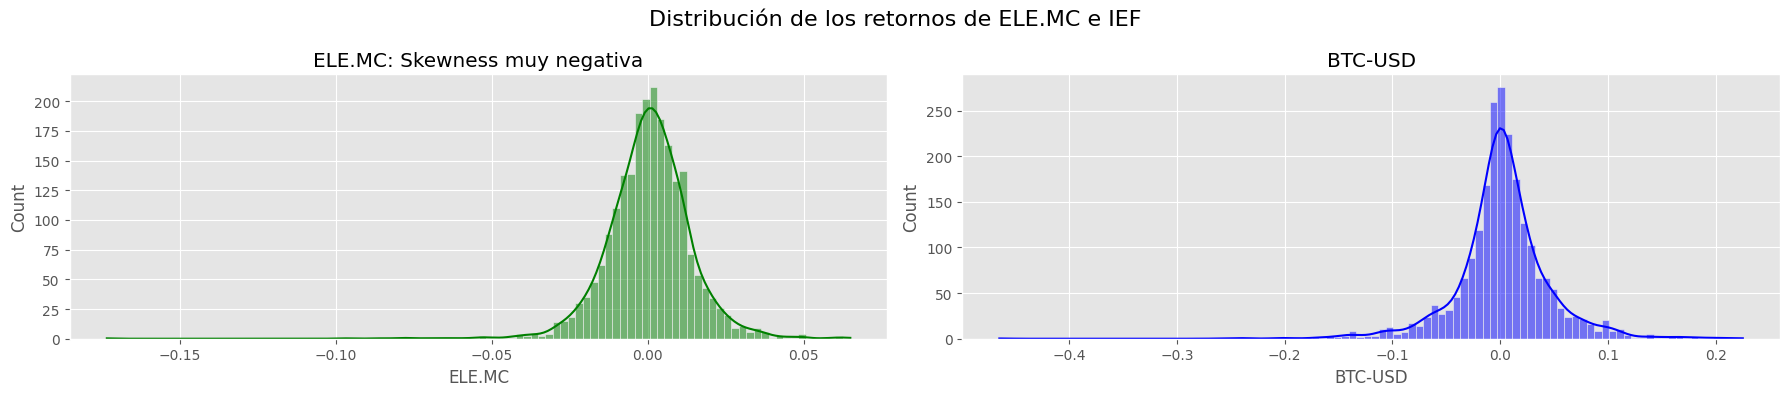

In [22]:


# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el histograma de los valores de 'Skewness' en el primer subplot
sns.histplot(data=retornos, x='ELE.MC', ax=axes[0], bins=100, color='green', kde=True, alpha=0.5, label='ELE.MC')

axes[0].set_title('ELE.MC: Skewness muy negativa')

# Crear el histograma de los valores de 'Kurtosis' en el segundo subplot

sns.histplot(data=retornos, x='BTC-USD', ax=axes[1], bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
#sns.histplot(retornos['BTC-USD'], bins=20, color='green', kde=True, ax=axes[1])
#axes[1].hist(momentos_df['Kurtosis'].values, bins=20, color='green')
axes[1].set_title('BTC-USD')

plt.suptitle('Distribución de los retornos de ELE.MC e IEF', fontsize=16)
# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



## VaR

El Valor en Riesgo (VaR) es una medida del riesgo de mercado de un activo o una cartera de activos. Se define como la pérdida máxima que se espera que un activo o una cartera de activos sufra en un período de tiempo determinado con un cierto nivel de confianza.

Por ejemplo, si el VaR de una acción es de 100 de euros con un nivel de confianza del 95%, esto significa que hay un 95% de probabilidad de que la acción pierda menos de 100 euros en un período de tiempo determinado.

Para calcular el VaR existen tres métodos:

* **Método paramétrico**: Se asume que los retornos siguen una distribución normal.

* **Método no paramétrico**: Se calcula el VaR directamente a partir de los datos históricos.

* **Método de simulación**: Se simulan los retornos de la acción y se calcula el VaR a partir de los retornos simulados.

Primero vamos a ver el efecto en un activo cuya distribución de los retornos se parece a una normal. Luego, lo veremos en dos activos cuyas distribuciónes de los retornos no se parecen a una normal. Para ello, seguimos los siguientes pasos:

1. Calculamos los parámetros de la distribución de los retornos de cada activo: media y desviación estándar.

2. Calculamos el VaR de cada activo usando el método paramétrico y el método no paramétrico.

3. Graficamos la distribución de los retornos de cada activo y el VaR calculado.

In [23]:
# 1. Calcula la media y la desviación estándar de los retornos de cada activo
mu_elec = retornos['ELE.MC'].mean()
sigma_elec = retornos['ELE.MC'].std()
mu_ief = retornos['IEF'].mean()
sigma_ief = retornos['IEF'].std()
mu_btc = retornos['BTC-USD'].mean()
sigma_btc = retornos['BTC-USD'].std()

In [24]:
# 2. Calcula el Var paramétrico y el Var histórico para un nivel de confianza del 95%
confianza = 0.95

# Calcular el VaR usando el método de la distribución normal
varn_95_ele = stats.norm.ppf(1 - confianza, mu_elec, sigma_elec)
varn_95_ief = stats.norm.ppf(1 - confianza, mu_ief, sigma_ief)
varn_95_btc = stats.norm.ppf(1 - confianza, mu_btc, sigma_btc)

# Calcular el VaR usando el método histórico
var_95_ele = np.percentile(retornos['ELE.MC'], 1 - confianza)
var_95_ief = np.percentile(retornos['IEF'], 1 - confianza)
var_95_btc = np.percentile(retornos['BTC-USD'], 1 - confianza)

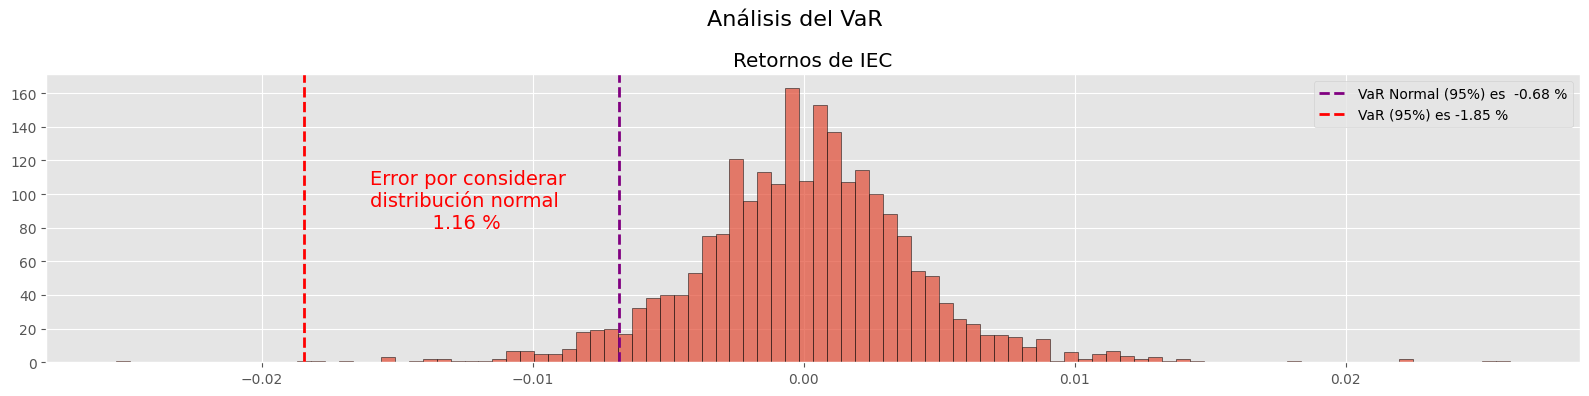

In [25]:
# 3. Hacemos la gráfica para un activo cua distribución de los retornos se parece a la normal IEF - Bonos US

fig, ax = plt.subplots(figsize=(16, 4))


ax.hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)

ax.axvline(x=varn_95_ief, color='purple', linestyle='--', linewidth=2, label=f'VaR Normal (95%) es  {100 * varn_95_ief:.2f} %')
ax.axvline(x=var_95_ief, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ief:.2f} %')
ax.text(-0.016, 80, f"Error por considerar\ndistribución normal\n          {100 * np.abs(var_95_ief-varn_95_ief):.2f} %", fontsize=14, color='RED')

ax.set_ylabel('')
ax.set_title('Retornos de IEC')
ax.legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

INTERPRETACIÓN DE LA GRÁFICA:

1- El **Var Normal** es el VaR calculado usando el método paramétrico, es decir, asumiendo que los retornos siguen una distribución normal.

*  Var Normal nos dice que hay un 95% de probabilidad de que la acción pierda menos del 0.68% en un día.

2- El **Var Histórico** es el VaR calculado usando el método no paramétrico, es decir, usando los datos históricos.

* Var Histórico nos dice que hay un 95% de probabilidad de que la acción pierda menos del 1.85% en un día.

Es decir, cometemos un **error al calcular el riesgo del 1.16%** al asumir que los retornos siguen una distribución normal.

Pero, ¿qué ocurre si usamos activos cuyas distribuciones de los retornos no se parecen a una normal?

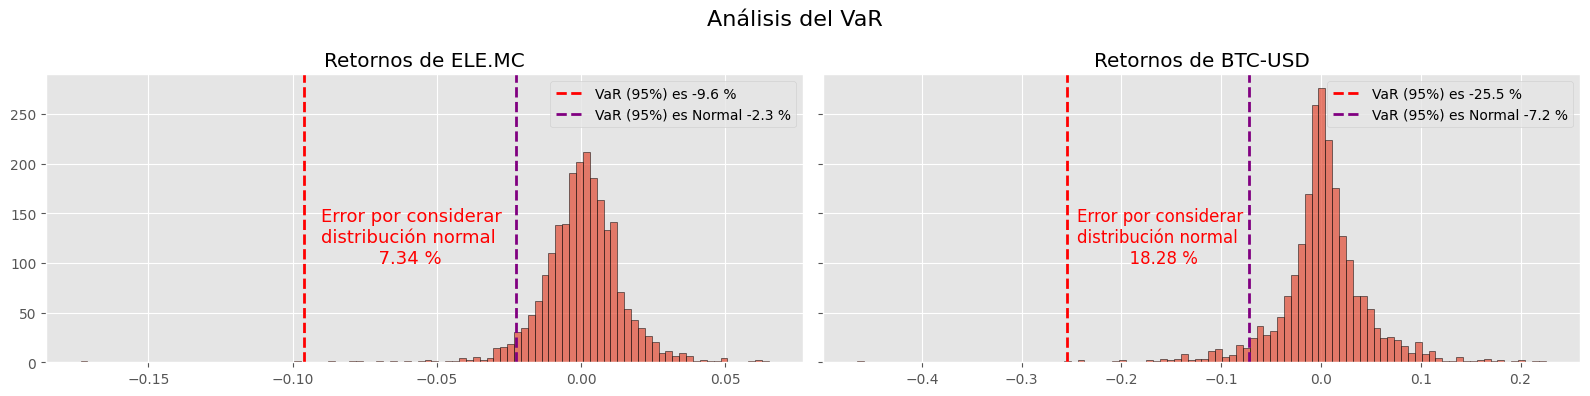

In [20]:
# 3. Hacemos la gráfica para dos activos cuyas distribuciones de los retornos NO se parece a la normal ELE-MC y BTC-USD

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=var_95_ele, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ele:.1f} %')
axes[0].axvline(x=varn_95_ele, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_ele:.1f} %')
axes[0].text(-0.09, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_ele-varn_95_ele):.2f} %", fontsize=13, color='RED')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['BTC-USD'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=var_95_btc, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_btc:.1f} %')
axes[1].axvline(x=varn_95_btc, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_btc:.1f} %')
axes[1].text(-0.245, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_btc-varn_95_btc):.2f} %", fontsize=12, color='RED')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de BTC-USD')
axes[1].legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

Es decir, cometemos un **error al calcular el riesgo del 7.34% y 18.28%**, respectivamente, al asumir que los retornos siguen una distribución normal.

___

## CVaR

+ El VaR tiene un problema: no considera cómo son los retornos que están por debajo del VaR. Es decir, dos activos pueden tener el mismo VaR pero uno puede tener retornos muy negativos y el otro no.

+ Para solucionar este problema se usa el CVaR o Conditional Value at Risk. El CVaR es la **media de los retornos que están por debajo del VaR**.

In [26]:
# Calcular el CVAR al 95%
cvar_95_ele = np.mean(retornos['ELE.MC'][retornos['ELE.MC'] < var_95_ele])
cvar_95_ief = np.mean(retornos['IEF'][retornos['IEF'] < var_95_ief])

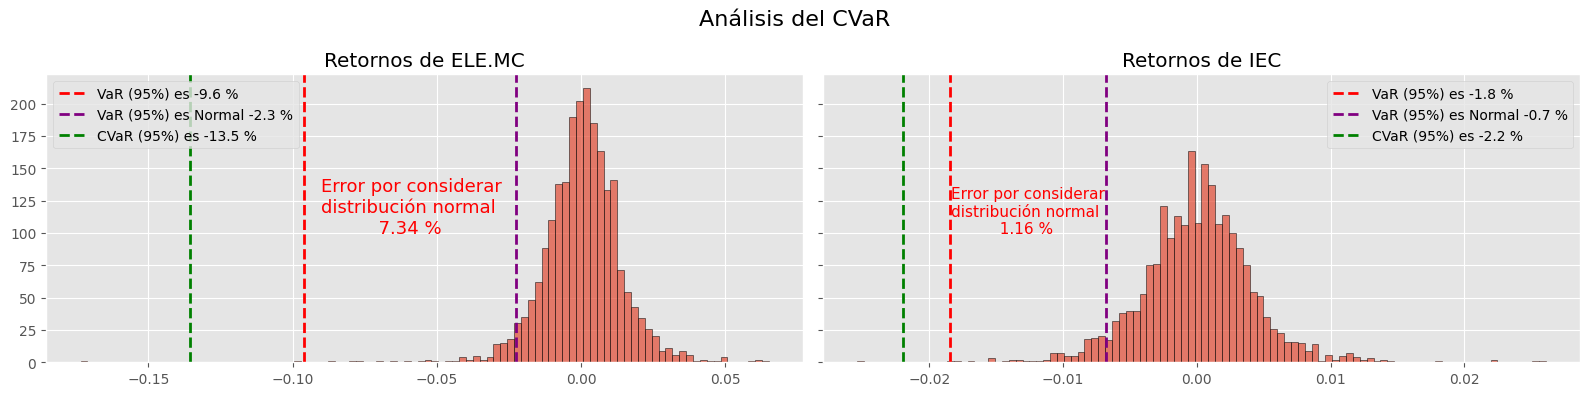

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=var_95_ele, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ele:.1f} %')
axes[0].axvline(x=varn_95_ele, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_ele:.1f} %')
axes[0].text(-0.09, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_ele-varn_95_ele):.2f} %", fontsize=13, color='RED')
axes[0].axvline(x=cvar_95_ele, color='green', linestyle='--', linewidth=2, label=f'CVaR (95%) es {100 * cvar_95_ele:.1f} %')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=var_95_ief, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ief:.1f} %')
axes[1].axvline(x=varn_95_ief, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_ief:.1f} %')
axes[1].text(-0.0184, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_ief-varn_95_ief):.2f} %", fontsize=11, color='RED')
axes[1].axvline(x=cvar_95_ief, color='green', linestyle='--', linewidth=2, label=f'CVaR (95%) es {100 * cvar_95_ief:.1f} %')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de IEC')
axes[1].legend()


plt.suptitle('Análisis del CVaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

En términos más prácticos, el CVaR responde a la pregunta: **"Si la pérdida supera el VaR, ¿cuánto esperamos perder en promedio?"**

___

## Maximum Drawdown

Max Drawdown es una medida del riesgo en las finanzas que nos ayuda a entender cuánto se puede perder en una inversión o cartera en el peor momento antes de que empiece a recuperarse.

1. **Encuentra el punto más alto**: Identifica el valor máximo alcanzado por la inversión hasta un cierto instante de tiempo.

2. **Encuentra el punto más bajo mientras no se supere el máximo**: Desde el punto más alto encontrado en el paso 1, busca el valor más bajo que alcanzó la inversión mientras no se haya superado ese máximo. Este valor más bajo representa la mayor caída o drawdown.

3. **Calcula el drawdown máximo**: Resta el valor más bajo del punto más alto encontrado en el paso 1. El resultado es el drawdown máximo

4. **Reinicia el cálculo después de superar el punto más alto**: Después de que el valor de la inversión supere el punto más alto anterior (el máximo registrado), comienza un nuevo cálculo de drawdown máximo. Esto significa que cualquier pérdida anterior se considera parte del drawdown pasado, y se inicia un nuevo registro del drawdown a partir del nuevo punto más alto.

El drawdown máximo evoluciona a medida que la inversión alcanza nuevos máximos. 

Vamos a calcular el Max Drawdown de un activo.

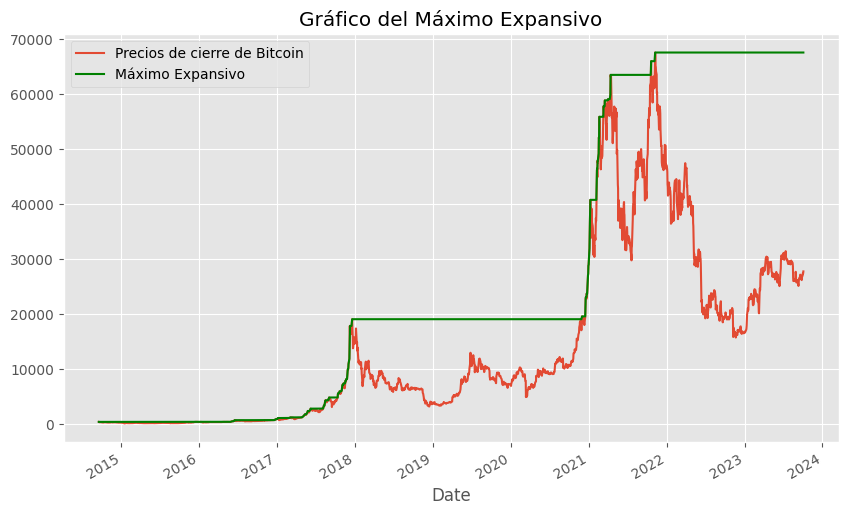

In [29]:
expanding_max = precios["BTC-USD"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 6))

precios["BTC-USD"].plot(label='Precios de cierre de Bitcoin');
expanding_max.plot(label='Máximo Expansivo', color='green');
plt.legend()
plt.title('Gráfico del Máximo Expansivo')
plt.show()

Ahora calculo el drawdown máximo de cada activo siguiendo la formula:

$$Drawdown = \frac{P_t - P_{max}}{P_{max}} = \frac{P_t}{P_{max}}-1$$

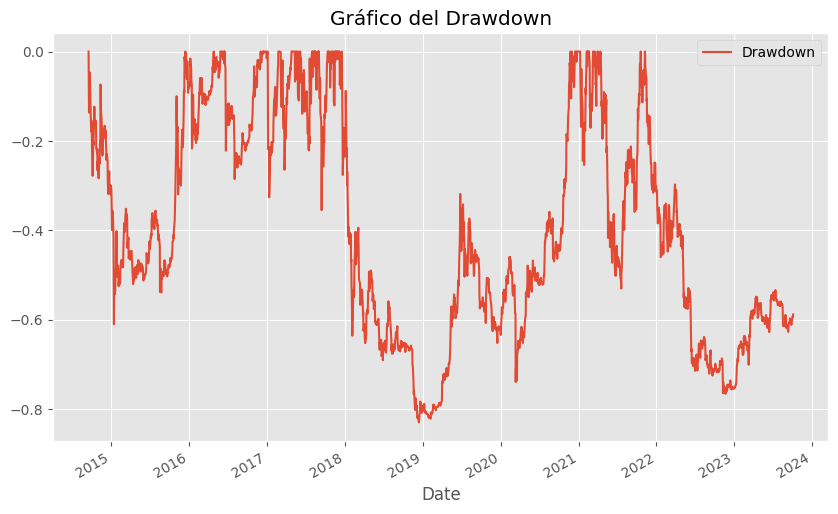

In [31]:
drawdown = precios["BTC-USD"] / expanding_max - 1
drawdown.plot(label = 'Drawdown', figsize=(10, 6));
plt.legend()
plt.title('Gráfico del Drawdown');

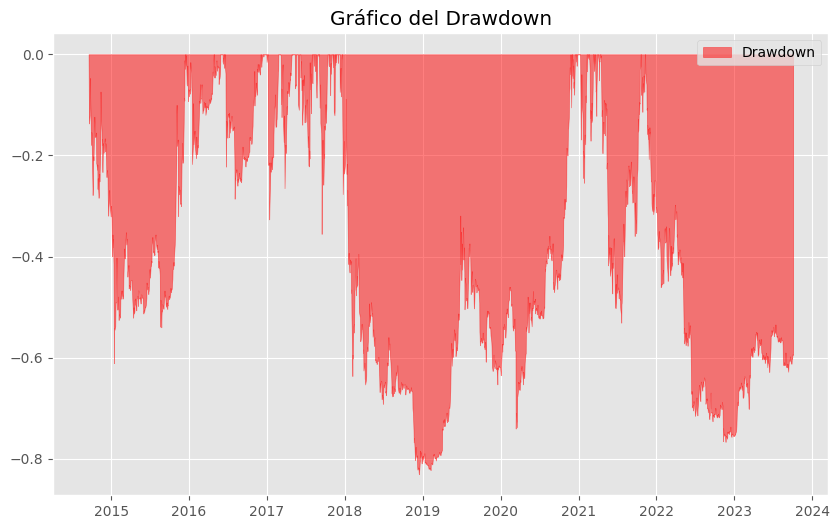

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.fill_between(precios["BTC-USD"].index.values, drawdown, label='Drawdown', color='red', alpha=0.5);

plt.legend()
plt.title('Gráfico del Drawdown');